## 🧬 **Comprenhensive EDA on Cancer Patient Dataset**

This project leverages advanced data analytics and global health data to uncover **actionable insights** into cancer care, patient outcomes, and healthcare disparities 🌍. Using a comprehensive dataset of **50,000 cancer patient records** collected across multiple countries between **2015 and 2024**, the goal is to bridge the gap between **raw data and data-driven, life-saving decisions**.

---

### 📊 What the Data Covers

The dataset provides a **360° view of cancer patient profiles**, including:

* **Demographics:** Age, gender, country, year of diagnosis
* **Genetic & Lifestyle Risk Factors:** Genetic predisposition, smoking, alcohol consumption, obesity 🚬🍺
* **Environmental Exposure:** Air pollution 🌫️
* **Clinical & Economic Variables:** Cancer type, cancer stage, treatment cost 💊💰
* **Patient Outcomes:** Survival years, severity scores

---

### 🎯 Core Objectives

#### 🔎 1. Exploratory Data Analysis (EDA)

* Identify key trends, hidden patterns, and meaningful relationships
* Visualize disparities in diagnosis, lifestyle factors, treatment costs, and outcomes
* Highlight variations across countries, age groups, and cancer stages

---

#### 📈 2. Inferential & Predictive Analytics

Using statistical and analytical methods, this project explores and answers critical healthcare questions:

* Determine the relationship between risk factors and cancer severity
* Analyze the proportion of early-stage diagnoses across cancer types
* Identify key predictors of cancer severity and survival years
* Explore the economic burden of cancer treatment across demographics and countries
* Assess whether higher treatment costs are associated with longer survival
* Evaluate whether advanced cancer stages lead to higher treatment costs and reduced survival
* Examine whether higher genetic risk amplifies the negative effects of smoking on cancer severity and survival outcomes



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("zahidmughal2343/global-cancer-patients-2015-2024")

# print("Path to dataset files:", path)

In [3]:
data= pd.read_csv("/content/global_cancer_patients_2015_2024.csv")

In [4]:
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


### Understanding the Data

In [5]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [6]:
data.duplicated().sum()

np.int64(0)

### Descriptive Analysis

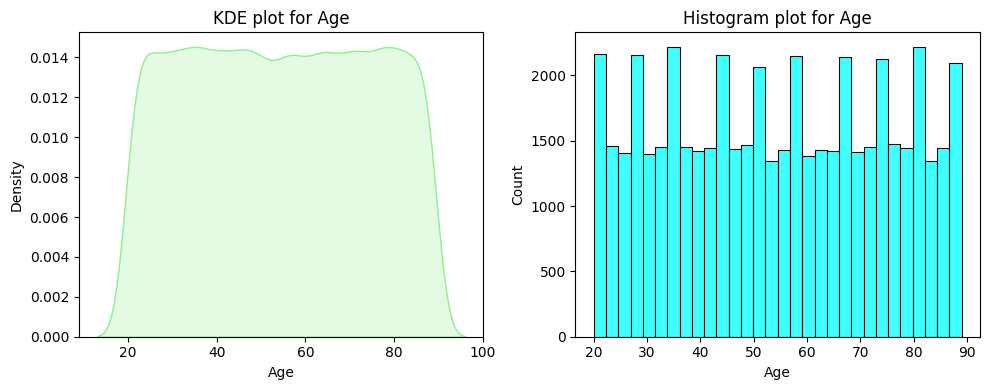

In [7]:
# plotting for age column
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.kdeplot(data["Age"], fill=True, color="lightgreen")
plt.title("KDE plot for Age")

plt.subplot(1,2,2)
sns.histplot(data["Age"], bins=30,  kde=False, color="cyan")
plt.title("Histogram plot for Age")

plt.tight_layout()
plt.show()

In [8]:
data["Age"].describe()

,Age
count,50000.000000
mean,54.421540
std,20.224451
min,20.000000
25%,37.000000
50%,54.000000
75%,72.000000
max,89.000000


#### **INFERENCE**

Range: 20 to 89 years

Mean Age: 54.42 years

Standard Deviation: 20.22

Interquartile Range (IQR): 37 (Q1) to 72 (Q3)

This suggests a broad representation of both young and elderly patients in the dataset, which supports age-based comparative analysis.

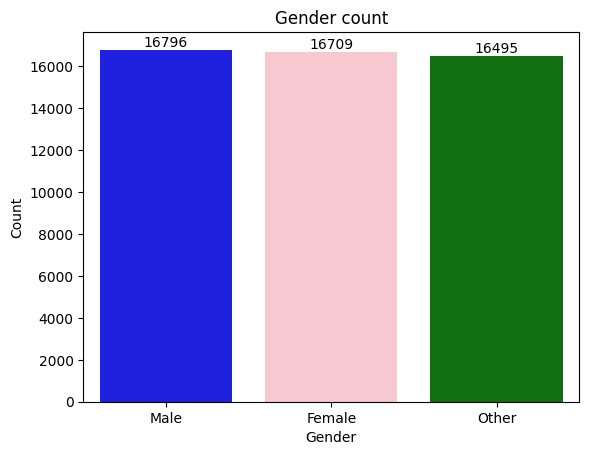

In [9]:
# Gender column
data["Gender"].value_counts()

sns.barplot(x= data["Gender"].value_counts().index,
            y= data["Gender"].value_counts().values,
            palette=["blue", "pink", "green"]
           )
for i , v in enumerate(data["Gender"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

plt.title("Gender count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

In [10]:
data["Gender"].value_counts()

,count
Gender,
Male,16796
Female,16709
Other,16495


### Inference of Age Column

The dataset contains three gender categories(Male, Female ,other) with the most common being Male (16,796 records).

Gender distribution is sufficient for evaluating gender-specific survival trends and severity outcomes.

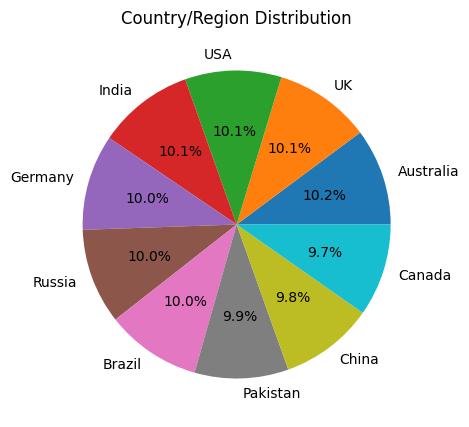

In [11]:
# countries column

country_counts= data["Country_Region"].value_counts()

plt.figure(figsize=(5,5))
plt.pie(x=country_counts.values,
        labels=country_counts.index,
        autopct= '%1.1f%%'
       )

plt.title("Country/Region Distribution")
plt.show()

In [12]:
country_counts

,count
Country_Region,
Australia,5092
UK,5060
USA,5060
India,5040
Germany,5024
Russia,5017
Brazil,5004
Pakistan,4926
China,4913


### Country Regional Inferences

Patients come from 10 different countries/regions, with Australia being the most represented (5,092 patients).

Number of data points for each country is almost same.

This diversity enables cross-country comparison of cancer outcomes and treatment economic.

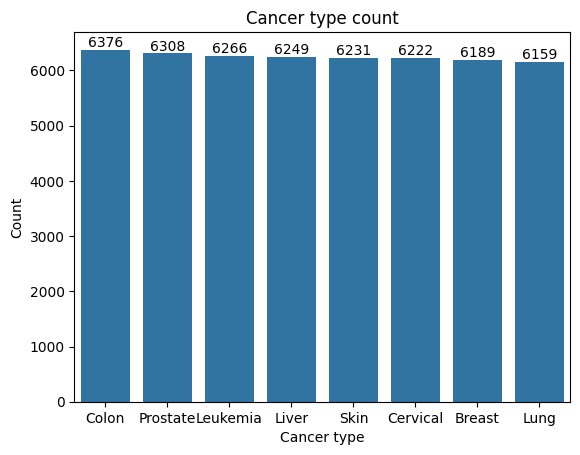

In [13]:
# cancer type
data["Cancer_Type"].value_counts()

sns.barplot(x=data["Cancer_Type"].value_counts().index,
            y=data["Cancer_Type"].value_counts().values)

for i , v  in enumerate(data["Cancer_Type"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

plt.title("Cancer type count")
plt.xlabel("Cancer type")
plt.ylabel("Count")
plt.show()

### Cancer Type Inferences

We have in  total 8 types of cancer , with each cancer having approx same number of data points under the label , most common cnacers are colon cancer followed by Prostate cancer



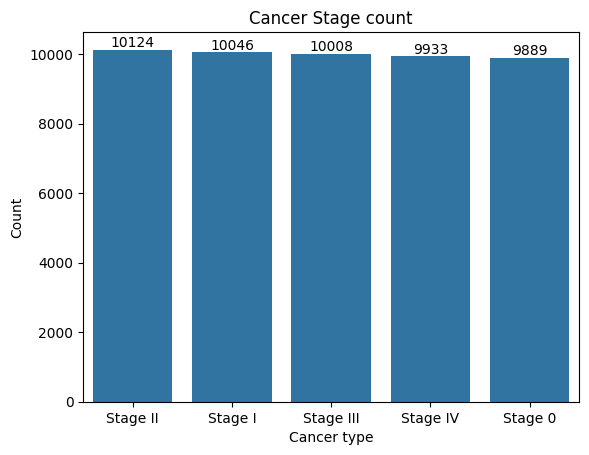

In [14]:
# Cancer Stage
data["Cancer_Stage"].value_counts()

sns.barplot(x=data["Cancer_Stage"].value_counts().index,
            y=data["Cancer_Stage"].value_counts().values)

for i , v  in enumerate(data["Cancer_Stage"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

plt.title("Cancer Stage count")
plt.xlabel("Cancer type")
plt.ylabel("Count")
plt.show()

Cancer Stage have 5 stages with values ranging from 0 to 4 , with stage 2 the most common one , and each stage have  almost same number of data pointsn under its label

##  ***ANALYLIZING THE RISK FACTORS***

In [15]:
column_of_interest= ['Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

In [16]:
data[column_of_interest].describe()

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.001698,5.010126,5.010880,4.989826,4.991176
std,2.885773,2.888399,2.888769,2.881579,2.894504
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.500000,2.500000,2.500000,2.500000,2.500000
50%,5.000000,5.000000,5.000000,5.000000,5.000000
75%,7.500000,7.500000,7.500000,7.500000,7.500000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [17]:
summary= data[column_of_interest].agg(['mean', "std", "min", "max"])
summary

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level
mean,5.001698,5.010126,5.010880,4.989826,4.991176
std,2.885773,2.888399,2.888769,2.881579,2.894504
min,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


These variables have nearly identical means and standard deviations, indicating they were likely designed on the same standardized scale.

 They are essential in studying interaction effects (e.g., genetic risk × smoking) on survival.

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

# Finding Some Actual Inferences

## Determine the relationship between risk factors and cancer severity

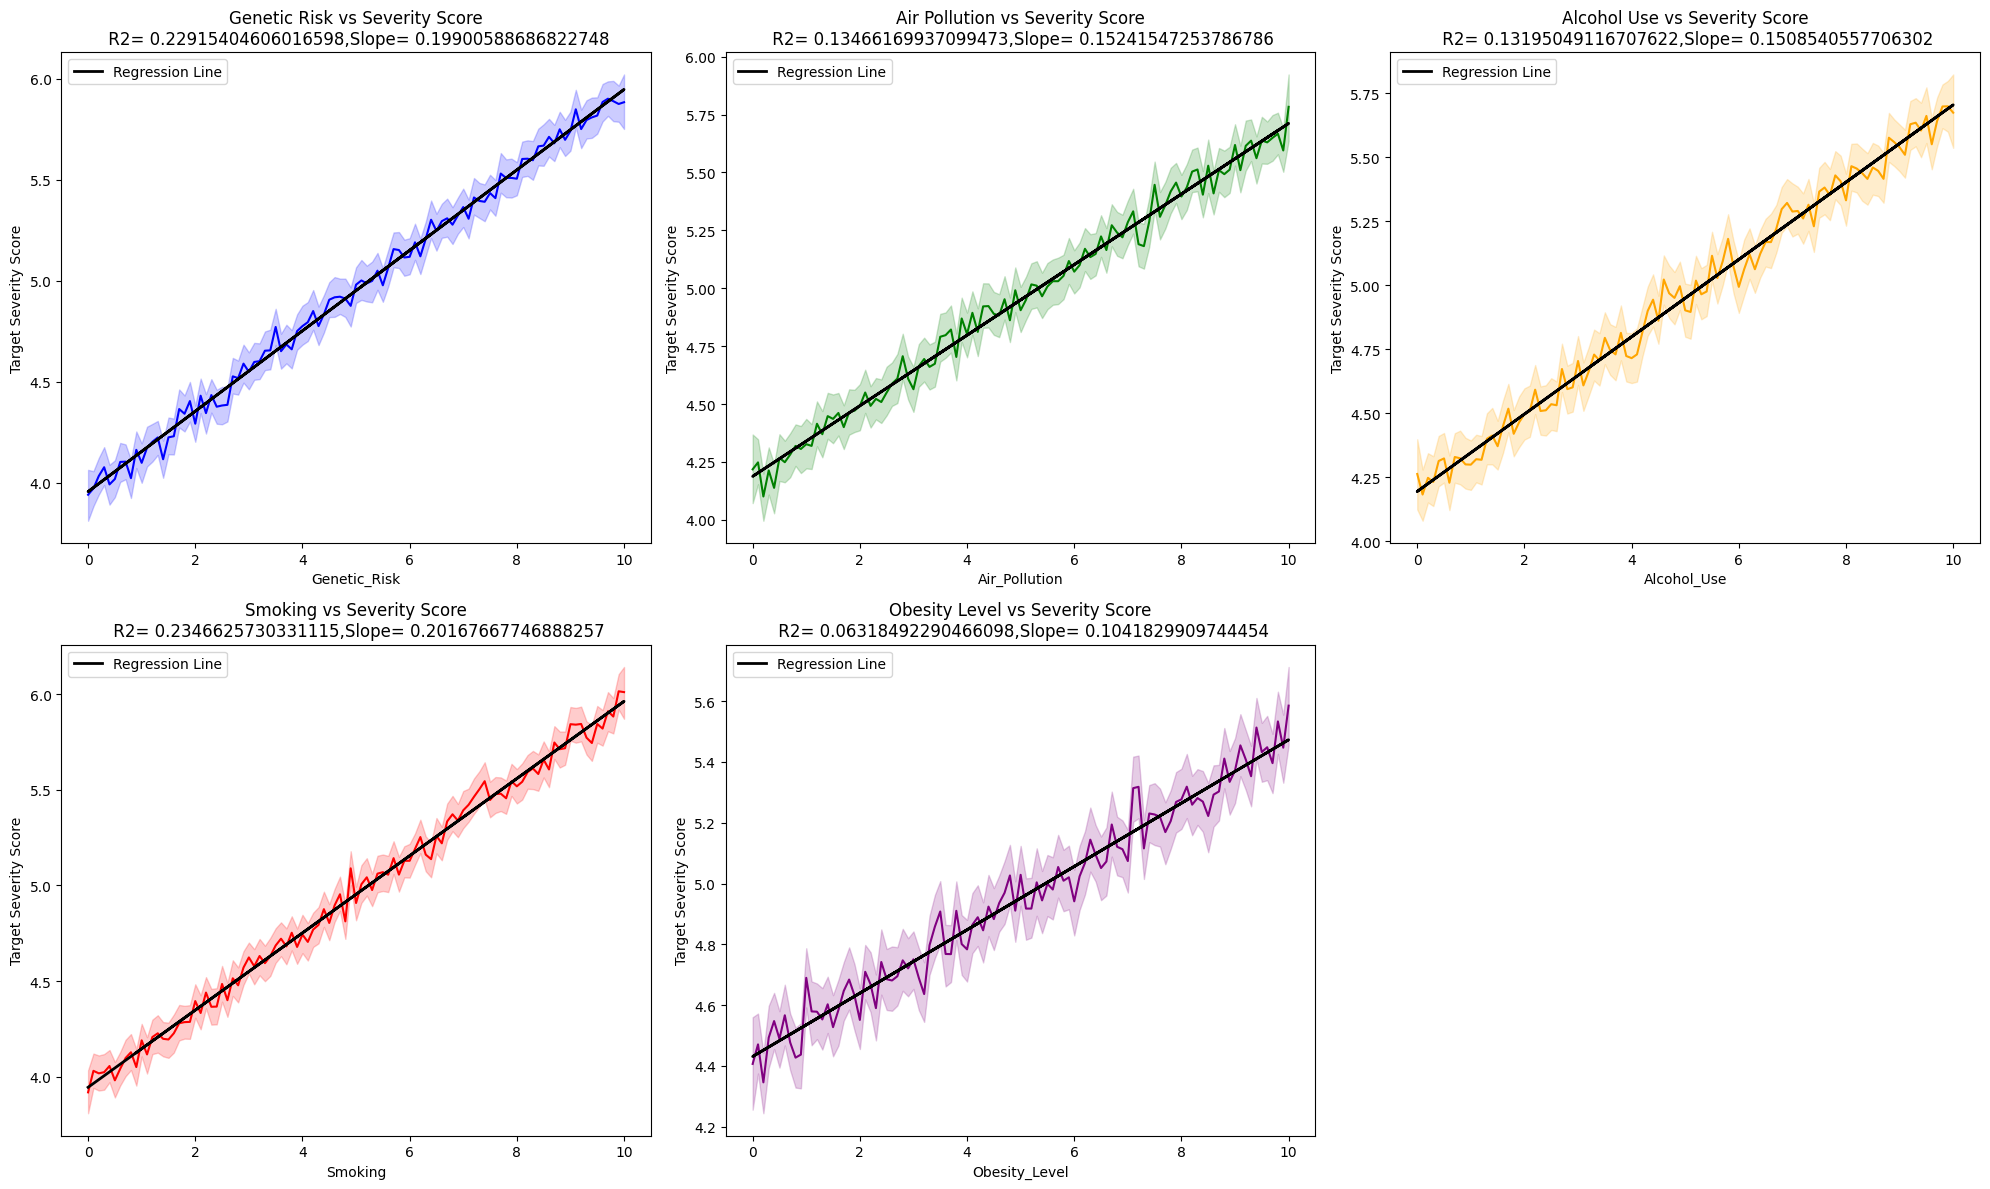

In [19]:
from scipy.stats import linregress

risk_factors= ['Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
titles= ['Genetic Risk','Air Pollution', 'Alcohol Use', 'Smoking', 'Obesity Level']
colors= ["blue", "green", "orange", "red", "purple"]

plt.figure(figsize=(20,12))
for i , (factor , title,color) in enumerate(zip(risk_factors, titles, colors),1):
    plt.subplot(2,3,i)

    x=data[factor]
    y=data["Target_Severity_Score"]
    slope, intercept , r_value , p_value , std_err= linregress(x,y)
    r_squared= r_value**2

    sns.lineplot(x=factor, y="Target_Severity_Score", data=data, color=color)
    plt.plot(x,x*slope+intercept, color="black", linewidth=2, label="Regression Line")
    plt.title(f"{title} vs Severity Score\n R2= {r_squared},Slope= {slope}")
    plt.xlabel(factor)
    plt.ylabel("Target Severity Score")
    plt.legend()

#line= y=mx+c

plt.tight_layout()
plt.show()

**Key Takeaways:**

*Weak Linear Relationships:*

The R² values for all risk factors are relatively low, ranging from 0.06 to 0.23. This indicates that while there is some relationship between these risk factors and the Target_Severity_Score, it is weak. These factors alone do not explain much of the variation in the target variable.

*Positive Trends*:

All the slope values are positive, suggesting that as each risk factor increases, the Target_Severity_Score tends to increase as well. However, because the R² values are low, this increase is not strongly consistent across all data points.

*Other Influences:*

The low R² values imply that other, unmeasured factors are likely contributing to the variation in Target_Severity_Score. The risk factors you examined are only weakly correlated with the target and are not reliable predictors on their own.

*Next Steps:*
Given the weak explanatory power of these individual factors, it might be useful to explore other variables or more complex models that could account for more of the variation in the Target_Severity_Score. This could include interactions between risk factors, adding new features, or applying more sophisticated regression techniques.

# Analyze the proportion of early-stage diagnoses by cancer type

In [20]:
data["Cancer_Type"].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [21]:
stage_count= data[data["Cancer_Type"]=="Lung"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of lungs cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of lungs cancer  diagnosed  at stage 0 and Stag 1 : 38.43156356551388


In [22]:
stage_count= data[data["Cancer_Type"]=="Leukemia"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Leukemia cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Leukemia cancer  diagnosed  at stage 0 and Stag 1 : 39.53080114905841


In [23]:
stage_count= data[data["Cancer_Type"]=="Breast"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Breast cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Breast cancer  diagnosed  at stage 0 and Stag 1 : 39.47325900791727


In [24]:
stage_count= data[data["Cancer_Type"]=="Colon"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Colon cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Colon cancer  diagnosed  at stage 0 and Stag 1 : 40.41718946047679


In [25]:
stage_count= data[data["Cancer_Type"]=="Skin"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Colon cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Colon cancer  diagnosed  at stage 0 and Stag 1 : 40.41084898090194


In [26]:
stage_count= data[data["Cancer_Type"]=="Cervical"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Cervical cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Cervical cancer  diagnosed  at stage 0 and Stag 1 : 39.85856637737062


In [27]:
stage_count= data[data["Cancer_Type"]=="Prostate"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Prostate cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Prostate cancer  diagnosed  at stage 0 and Stag 1 : 40.187064045656314


In [28]:
stage_count= data[data["Cancer_Type"]=="Liver"]["Cancer_Stage"].value_counts()
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
total_sum= stage_count.sum()
proportion= (early_stage_sum/total_sum)*100
print(f"proportion  of Liver cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Liver cancer  diagnosed  at stage 0 and Stag 1 : 40.614498319731155


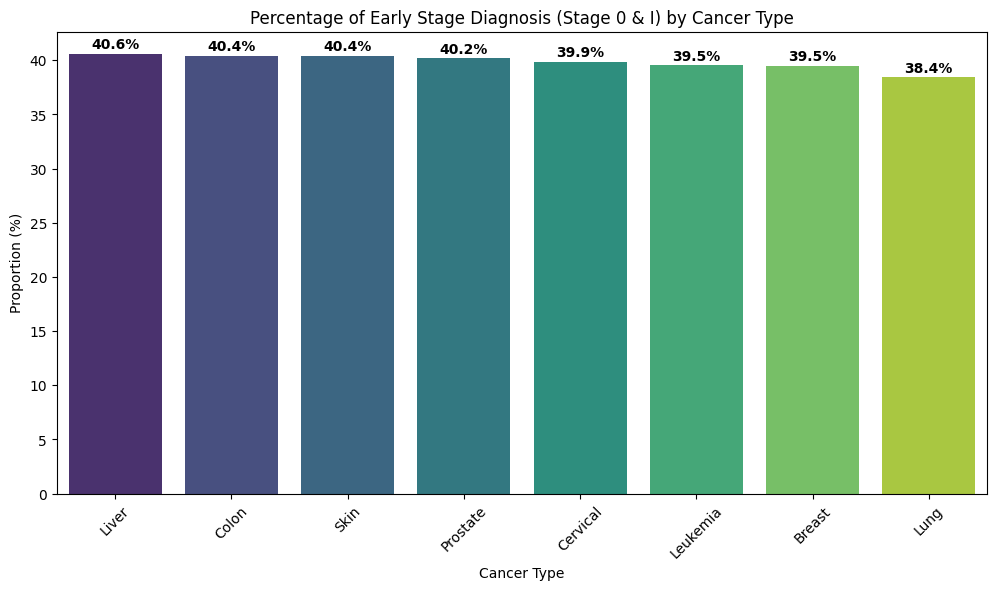

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Get the list of all unique cancer types
cancer_types = data["Cancer_Type"].unique()

# 2. Create an empty list to store our results
results = []

# 3. The Loop: Do the math for each cancer type automatically
for cancer in cancer_types:
    stage_count = data[data["Cancer_Type"] == cancer]["Cancer_Stage"].value_counts()

    early_stage_sum = stage_count.get("Stage 0", 0) + stage_count.get("Stage I", 0)
    total_sum = stage_count.sum()

    # Calculate proportion (handle cases where total_sum might be 0)
    proportion = (early_stage_sum / total_sum) * 100 if total_sum > 0 else 0

    # Save the result as a small dictionary
    results.append({"Cancer_Type": cancer, "Early_Detection_Rate": proportion})

# 4. Convert our results list into a new DataFrame for easy plotting
df_results = pd.DataFrame(results).sort_values(by="Early_Detection_Rate", ascending=False)

# 5. Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(data=df_results, x="Cancer_Type", y="Early_Detection_Rate", palette="viridis")

# Adding the labels on top (using the trick we learned earlier!)
for i, v in enumerate(df_results["Early_Detection_Rate"]):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha="center", fontweight='bold')

plt.title("Percentage of Early Stage Diagnosis (Stage 0 & I) by Cancer Type")
plt.ylabel("Proportion (%)")
plt.xlabel("Cancer Type")
plt.xticks(rotation=45)
plt.show()

The analysis demonstrates that early-stage diagnosis for various cancer types is relatively widespread, with most cancers having an early diagnosis rate between 3**8.43% and 40.61%.**

Liver Cancer shows the highest proportion, while Lung Cancer shows the lowest.
 These findings suggest that while screening and diagnostic methods are effective, improvements can still be made, particularly in lung cancer detection.

Further research into screening strategies, early intervention, and the use of advanced diagnostic technologies could help increase the proportion of early-stage diagnoses, ultimately leading to better survival rates and outcomes for cancer patients. The relatively small variations across the cancer types indicate that, in general, healthcare systems may need to focus on enhancing early detection uniformly, with targeted efforts to address specific gaps in detection, particularly for cancers like lung cancer.

# Identify key predictors of cancer severity and survival years.

In [30]:
features= ["Age", 'Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

targets= ["Survival_Years","Target_Severity_Score"]

#calculate correlations
pearson_corr= data[features+targets].corr(method="pearson")
spearman_corr= data[features+targets].corr(method="spearman")

# slice out only thr relationship with target variables
pearson_results= pearson_corr[targets]
spearman_results=spearman_corr[targets]

#combine both
correlation_df= pd.concat([pearson_results,spearman_results], axis=1, keys=["Pearson","Spearman"])
correlation_df

Pearson                             Spearman  \
                      Survival_Years Target_Severity_Score Survival_Years   
Age                        -0.000147             -0.001481      -0.000149   
Genetic_Risk                0.001708              0.478700       0.001684   
Air_Pollution               0.000893              0.366963       0.000841   
Alcohol_Use                -0.000527              0.363250      -0.000543   
Smoking                     0.001371              0.484420       0.001372   
Obesity_Level               0.009771              0.251366       0.009780   
Survival_Years              1.000000              0.004161       1.000000   
Target_Severity_Score       0.004161              1.000000       0.003431   

                                             
                      Target_Severity_Score  
Age                               -0.002076  
Genetic_Risk                       0.472193  
Air_Pollution                      0.357528  
Alcohol_Use                        0.354694  
Smoking                            0.477881  
Obesity_Level                      0.243152  
Survival_Years                     0.003431  
Target_Severity_Score              1.000000

**Using Random Forest Feature Selection**

In [31]:
# random forest for target severity score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# caonveting categorical columns to numerical columns
categorical_cols= ["Gender","Country_Region","Cancer_Type","Cancer_Stage"]
for col in categorical_cols:
    le= LabelEncoder()
    data[col]=le.fit_transform(data[col])

# Preparing  features and input
X= data.drop(columns=["Patient_ID","Survival_Years","Target_Severity_Score","Treatment_Cost_USD"])
y_severity= data["Target_Severity_Score"]

# train test split
X_train_s, X_test_s, y_train_s, y_test_s= train_test_split(X, y_severity, test_size=0.2, random_state=40)

# train the model
model= RandomForestRegressor(n_estimators=200, max_depth= None , min_samples_split=2,min_samples_leaf=1, random_state=40)
model.fit(X_train_s, y_train_s)

# evalaute the model
train_r2_severity= r2_score(y_train_s , model.predict(X_train_s))
test_r2_severity= r2_score(y_test_s , model.predict(X_test_s))


In [32]:
print(train_r2_severity)
print(test_r2_severity)

0.9689503792116058
0.7752278237418935


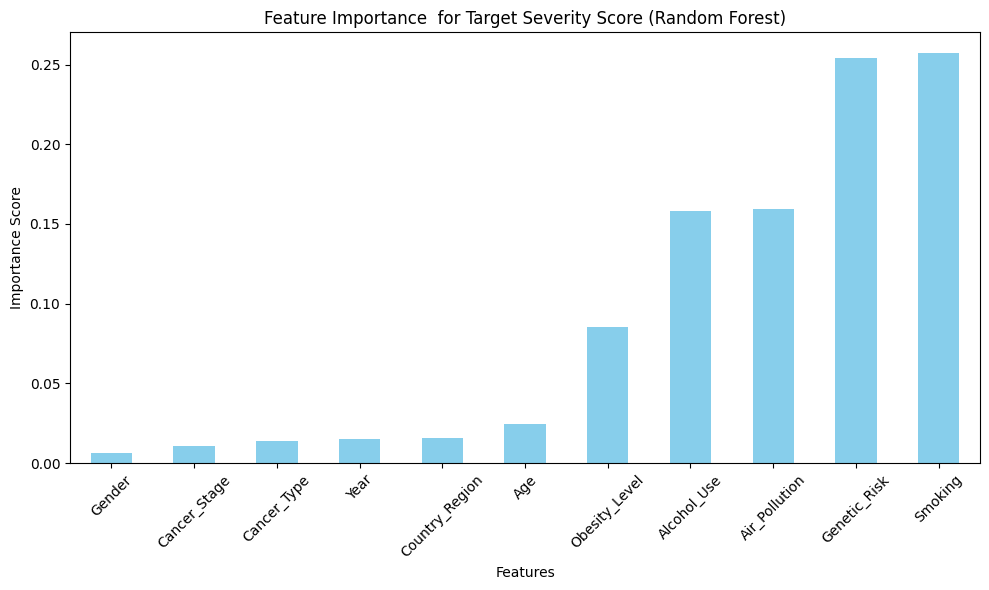

In [33]:
feature_importance_severity= pd.Series(model.feature_importances_, index=X.columns,).sort_values(ascending=True)

#plotting of important features
plt.figure(figsize=(10,6))
feature_importance_severity.plot(kind="bar", color="skyblue")
plt.title("Feature Importance  for Target Severity Score (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.xticks(rotation= 45)
plt.tight_layout()
plt.show()

**Feature	Importance	Interpretation**  

**Smoking	0.2336	Most important** predictor of severity score. The more a patient smokes, the higher their severity tends to be.

**Genetic_Risk	0.2286	**Strong genetic predisposition is nearly as important as smoking.

Treatment_Cost_USD	0.2133	Higher treatment costs are associated with more severe conditions.
Alcohol_Use	0.1291	Alcohol also plays a significant role.
Air_Pollution	0.1271	Environmental factor—patients in more polluted areas have worse severity scores.
Obesity_Level	0.0573	Has an effect, but much smaller.
Age to Gender	< 0.01	Very low importance; these don’t explain much variation in severity score.


E.g., Smoking, Genetic Risk, AIr plollution are major influencers. This tells you where interventions might reduce severity.


In [34]:
# # random forest for target severity score
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import r2_score

# # caonveting categorical columns to numerical columns
# categorical_cols= ["Gender","Country_Region","Cancer_Type","Cancer_Stage"]
# for col in categorical_cols:
#     le= LabelEncoder()
#     data[col]=le.fit_transform(data[col])

# # Preparing  features and input
# X= data.drop(columns=["Patient_ID","Survival_Years","Target_Severity_Score","Treatment_Cost_USD"])
# y_severity= data["Survival_Years"]

# # train test split
# X_train_s, X_test_s, y_train_s, y_test_s= train_test_split(X, y_severity, test_size=0.2, random_state=40)

# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [5, 10, None],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# # train the model
# model= RandomForestRegressor(random_state=40)
# GSC= GridSearchCV(model , param_grid, cv=3, scoring="r2", n_jobs=-1)
# GSC.fit(X_train_s, y_train_s)

# best_rf_severity= GSC.best_estimators_

# # evalaute the model
# train_r2_severity= r2_score(y_train_s , best_rf_severity.predict(X_train_s))
# test_r2_severity= r2_score(y_test_s , best_rf_severity.predict(X_test_s))


In [35]:
from sklearn.model_selection import RandomizedSearchCV

# 1. Use max_samples to speed up training on 50,000 rows
# This tells each tree to only look at 10% of the data (5,000 rows)
model = RandomForestRegressor(max_samples=0.1, random_state=40, n_jobs=-1)

# 2. Keep your parameter grid as is
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# 3. Use RandomizedSearchCV instead of GridSearchCV
# n_iter=5 means it will only pick 5 random combinations to try
# This will be MUCH faster than checking all 24 combinations
RSC = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=5,
    cv=3,
    scoring="r2",
    n_jobs=-1,
    random_state=40
)

# 4. Fit the model
RSC.fit(X_train_s, y_train_s)

# 5. Get the winner
best_rf_severity = RSC.best_estimator_

# 6. Evaluate
train_r2_severity = r2_score(y_train_s, best_rf_severity.predict(X_train_s))
test_r2_severity = r2_score(y_test_s, best_rf_severity.predict(X_test_s))

print(f"Best Parameters: {RSC.best_params_}")
print(f"Train R2: {train_r2_severity:.4f}")
print(f"Test R2: {test_r2_severity:.4f}")

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
Train R2: 0.8135
Test R2: 0.7762


<Axes: xlabel='Survival_Years', ylabel='Count'>

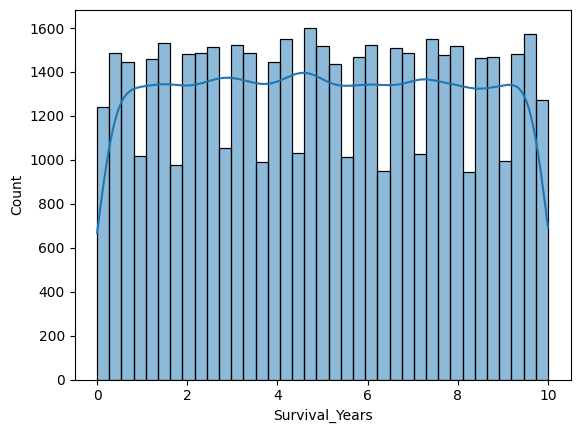

In [36]:
import seaborn as sns
sns.histplot(data["Survival_Years"], kde=True)

In [37]:
data.corr(numeric_only=True)["Survival_Years"].sort_values(ascending=True)

,Survival_Years
Gender,-0.007121
Cancer_Stage,-0.003014
Cancer_Type,-0.001717
Alcohol_Use,-0.000527
Treatment_Cost_USD,-0.000429
Age,-0.000147
Year,0.000018
Air_Pollution,0.000893
Smoking,0.001371
Genetic_Risk,0.001708


"The information in your columns does not help the model

figure out how long someone will survive."

### Explore the economic burden of cancer treatment across different demographics and countries

In [38]:
data = pd.read_csv("global_cancer_patients_2015_2024.csv")
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [39]:
data["Age_Group"]=pd.cut(data["Age"],bins=[0,30,45,60,75,100],labels=["0-30","31-45","46-60","61-75","76+"])

In [40]:
country_age_cost= data.groupby(["Country_Region", "Age_Group","Gender"])["Treatment_Cost_USD"].mean().reset_index()

In [41]:
country_age_cost

,Country_Region,Age_Group,Gender,Treatment_Cost_USD
0,Australia,0-30,Female,53287.701319
1,Australia,0-30,Male,52939.875035
2,Australia,0-30,Other,53776.208452
3,Australia,31-45,Female,51647.694000
4,Australia,31-45,Male,54212.453438
...,...,...,...,...
145,USA,61-75,Male,55381.892304
146,USA,61-75,Other,52070.474766
147,USA,76+,Female,51877.032768
148,USA,76+,Male,52445.346342


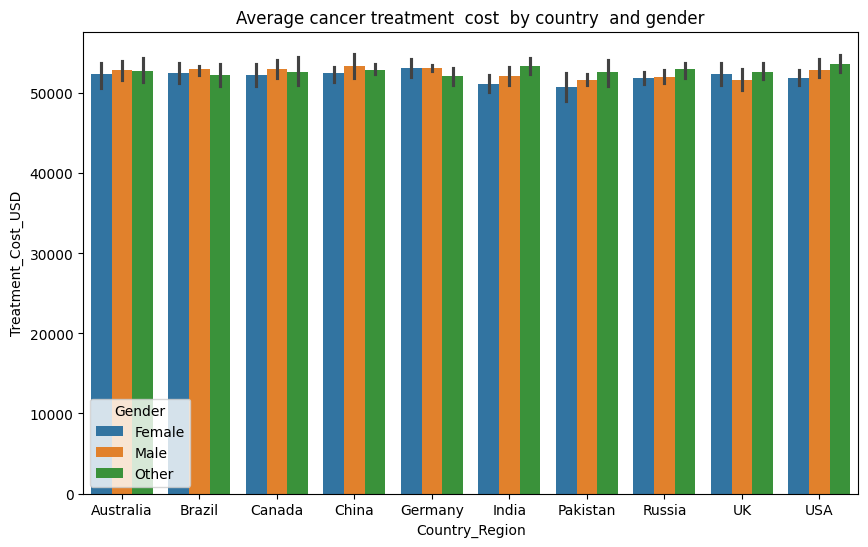

In [42]:
country_age_cost= data.groupby(["Country_Region", "Age_Group","Gender"])["Treatment_Cost_USD"].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=country_age_cost,x="Country_Region", y="Treatment_Cost_USD", hue="Gender")
plt.title("Average cancer treatment  cost  by country  and gender")
plt.show()

In [43]:
country_age_cost= data.groupby(["Country_Region", "Age_Group"])["Treatment_Cost_USD"].mean().reset_index()

In [44]:
heatmap_data= country_age_cost.pivot(index="Age_Group", columns="Country_Region", values="Treatment_Cost_USD")

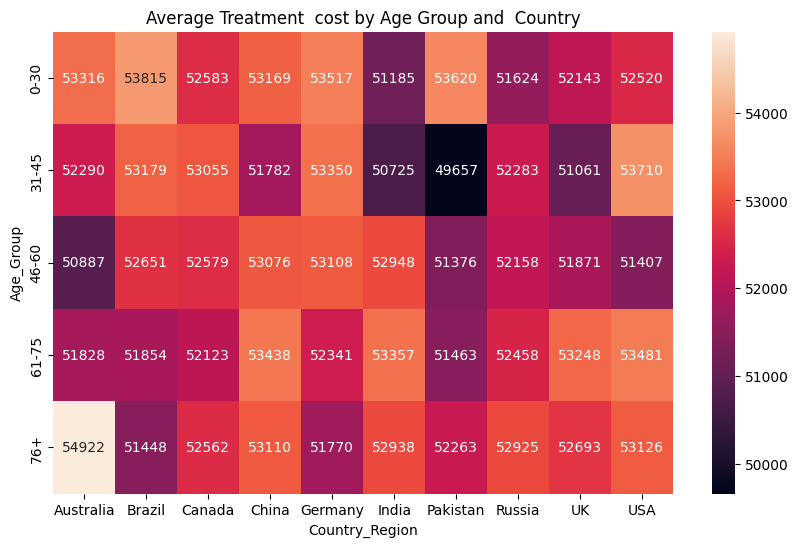

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f")
plt.title("Average Treatment  cost by Age Group and  Country")
plt.show()

1. Where you live matters
Treatment is most expensive in developed nations like the USA, Australia, and China. In contrast, costs in India and Pakistan are much lower. This shows a massive global gap in healthcare affordability.

2. Gender doesn't change the price
Men and women pay roughly the same amount for cancer care. While this suggests that pricing is fair and standardized, it also means the heavy financial burden of cancer hits everyone equally, regardless of gender.

3. Costs jump as you get older
As patients pass age 61, treatment costs spike, especially in the USA and Australia. This is likely due to more complex health needs in seniors, making the elderly the most financially vulnerable group.

4. Public healthcare provides stability
Countries with strong public systems (like Canada, Germany, and the UK) have much steadier costs. These systems successfully "level the playing field," preventing huge price swings and protecting patients from extreme financial stress.

# Assess whether higher treatment cost is associated with longer survival

Null Hypothesis (H₀) :- There is no correlation between treatment cost and survival years.

Alternative Hypothesis (H₁):- There is a correlation (positive or negative) between treatment cost and survival years.

In [46]:
from scipy.stats  import pearsonr, spearmanr
x= data["Treatment_Cost_USD"]
y=data["Survival_Years"]

# performing pearson correlation test
pearson_corr, pearson_p = pearsonr(x,y)
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"Pearson P-Value : {pearson_p}")

# Spearman correlation test
spearman_corr, spearman_p = spearmanr(x,y)
print(f"spearman Correlation Coefficient: {spearman_corr}")
print(f"spearman P-Value : {spearman_p}")

alpha=0.05

def interpret_corr(corr, p, method):
    if p<alpha:
        print(f"{method}, we  reject thr hull hypothesis")
    else:
        print(f"{method}, we failed to reject null hypothesis")

interpret_corr(pearson_corr,pearson_p,"Pearson")
interpret_corr(spearman_corr,spearman_p,"Spearman")

Pearson Correlation Coefficient: -0.00042940542830214993
Pearson P-Value : 0.9235082012963275
spearman Correlation Coefficient: -0.0004454737292549569
spearman P-Value : 0.9206551702014918
Pearson, we failed to reject null hypothesis
Spearman, we failed to reject null hypothesis


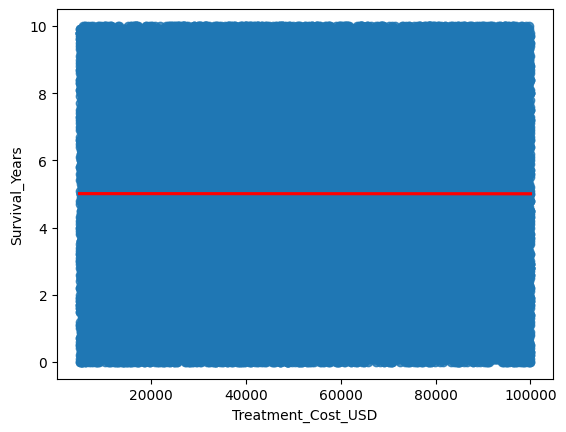

In [47]:
sns.regplot(x=x, y=y, line_kws={"color":"red"})
plt.show()

**There is no relationship between Treatment cost and survival years.**

# Evaluate if higher cancer stages lead to greater treatment costs and reduced survival years

In [48]:
df= data.copy()

In [49]:
stage_order = ['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']

In [50]:
grouped_stats= df.groupby("Cancer_Stage")[["Treatment_Cost_USD","Survival_Years"]].mean().reset_index()

In [51]:
grouped_stats

,Cancer_Stage,Treatment_Cost_USD,Survival_Years
0,Stage 0,52572.589493,5.015199
1,Stage I,52674.079638,5.012990
2,Stage II,52082.841258,4.995170
3,Stage III,52708.197506,5.036311
4,Stage IV,52302.471041,4.972596


Treatment Cost vs. Cancer Stage

**Null Hypothesis (H₀): **The average treatment cost is the same across all cancer stages.
**Alternative Hypothesis (H₁)**: At least one stage has a different average cost.
    
Survival Years vs. Cancer Stage

**Null Hypothesis (H₀):** The average survival years are the same across all cancer stages.
**Alternative Hypothesis (H₁):** At least one stage has a different survival duration.

In [52]:
grouped_costs=[]
grouped_survival=[]


for  stage in stage_order:
    stage_data= df[df["Cancer_Stage"]==stage]
    cost= stage_data["Treatment_Cost_USD"]
    survival= stage_data["Survival_Years"]
    grouped_costs.append(cost)
    grouped_survival.append(survival)

In [53]:
len(grouped_costs)

5

In [54]:
# check for normaility
from scipy.stats import  shapiro, f_oneway
normal_cost=0
normal_survival=0

for i in range (len(stage_order)):
    cost_p= shapiro(grouped_costs[i]).pvalue
    surv_p= shapiro(grouped_survival[i]).pvalue
    print(f" cost {cost_p} for group {i}")
    print(f"Survival {surv_p} for group {i}")
    if cost_p<0.05:
        normal_cost+=1
    if surv_p<0.05:
        normal_survival+=1

 cost 1.5471821061637387e-47 for group 0
Survival 1.6291039522109283e-47 for group 0
 cost 7.306523956950957e-48 for group 1
Survival 7.575551046259697e-48 for group 1
 cost 8.943579643043388e-48 for group 2
Survival 4.041659465829829e-48 for group 2
 cost 5.267270033022367e-48 for group 3
Survival 1.3648520457944784e-47 for group 3
 cost 1.5838640189581322e-47 for group 4
Survival 2.2992598289836786e-47 for group 4


In [55]:
from scipy.stats import kruskal
kusrkal_cost =kruskal(*grouped_costs)
kurkal_survival= kruskal(*grouped_survival)

p_cost= kusrkal_cost.pvalue
p_survival= kurkal_survival.pvalue

In [56]:
p_cost

np.float64(0.4254451689062656)

In [57]:
p_survival

np.float64(0.6033078729984223)

=== Kruskal-Wallis Test: Treatment Cost across Cancer Stages ===

P-value: 0.4254
Conclusion: No significant difference in treatment costs among cancer stages.

=== Kruskal-Wallis Test: Survival Years across Cancer Stages ===

P-value: 0.6033
Conclusion: No significant difference in survival years among cancer stages.

# Examine whether higher genetic risk amplifies the negative effects of smoking on cancer severity

Null Hypothesis (H₀):
The interaction effect between genetic risk and smoking on cancer Severity is not significant.
(Genetic risk does not amplify or alter the effect of smoking.)

Alternative Hypothesis (H₁):
The interaction effect between genetic risk and smoking on  cancer severity is significant.
(Genetic risk does amplify or alter the effect of smoking.)

In [58]:
import statsmodels.formula.api as smf

model = smf.ols("Target_Severity_Score ~ Genetic_Risk*Smoking", data=data).fit()

model.summary2().tables[1].loc["Genetic_Risk:Smoking"]

,Genetic_Risk:Smoking
Coef.,-0.000228
Std.Err.,0.000471
t,-0.484187
P>|t|,0.628255
[0.025,-0.001150
0.975],0.000694


In [59]:
p_value=0.628255

Interpretation:
The interaction coefficient is negative but very small: -0.000228

The p-value = 0.628, which is greater than 0.05, so we fail to reject the null hypothesis

🧪 Conclusion (Statistical):
✅ Test Used: Multiple Linear Regression with interaction term

📌 Null Hypothesis (H₀): No interaction effect between genetic risk and smoking

📌 Alternative Hypothesis (H₁): There is an interaction effect

The interaction effect between Genetic Risk and Smoking on Target Severity Score is not statistically significant (p = 0.628 > 0.05).

This means that based on your data, there is no evidence that Genetic Risk amplifies or reduces the effect of Smoking on the Target Severity Score.

In other words, smoking and genetic risk may each have independent effects (or none), but they do not interact in a way that significantly changes the outcome.